<div style="text-align: center; font-size: 24px; font-weight: bold;">
    YZV 211E Homework 2
</div>


In this assignment, we will examine the World Energy Consumption dataset maintained by Our World in Data. We will use different visualization techniques to analyze this dataset and try to identify the connections and patterns within it. Each question will encourage you to approach the dataset differently and use various visualization techniques while exploring such large datasets.

* If you need you can implement data cleaning/preparation steps before data visualization.

* Do not use the same visualization method for each question, try to choose different techniques among the most appropriate ones.
,
* If any data processing steps are required before visualization, solve these problems as efficiently as possible with pandas. Avoid using unnecessary loops.
  
* Don't forget to leave comments in the notebook. Print the necessary outputs at each stage in your code. Assignments without necessary outputs and comments will be deducted points.
  
* Since this is a visualization assignment, in addition to giving the correct answer, you will also be evaluated on visual details (titles, naming, legend, etc.)

**Important:**
* **Run the notebooks before the submission.**

If you have any questions regarding the assignment, you can contact the T.A. Barış Bilen (bilenb20@itu.edu.tr).

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\NURETTİN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\NURETTİN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\NURETTİN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\NURETTİN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\NURETTİN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Use the following libraries.
# For this assignment, you will not need any additional libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

You can download the dataset from [here](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption).

This dataset provides detailed information on global energy consumption trends, highlighting the usage and growth of various energy sources such as solar, wind, and biofuel across different countries over time. It includes demographic and economic indicators, such as population and GDP, to contextualize energy consumption patterns.

In [20]:
# Read the CSV file into a DataFrame
df = pd.read_csv('World Energy Consumption.csv')
df=df.dropna(subset=["iso_code"])#ülke olmayan kısımları çıkardık, eğer ki iso_code'u yoksa ülke değildir
df["energy_consumption"]=(df["energy_per_capita"]*df["population"])/10**9
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,energy_consumption
23,Afghanistan,1900,AFG,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,1901,AFG,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1902,AFG,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1903,AFG,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1904,AFG,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Q1 Temporal Analysis of Energy Consumption (20 points)

- Find the energy consumption of the top 10 most populous countries over the years and visualize this change.

In [21]:
columns=["country", "year", "population", "energy_consumption"]
filtered_df=df[columns]


#istediğimiz satırlardan oluşan df yazdırdık
filtered_df=filtered_df.dropna()
#NaN içeren satırları sildik
filtered_df.head()




,country,year,population,energy_consumption
103,Afghanistan,1980,12486640.0,7.790777
104,Afghanistan,1981,11155196.0,8.777321
105,Afghanistan,1982,10088290.0,9.348324
106,Afghanistan,1983,9951447.0,11.436163
107,Afghanistan,1984,10243689.0,11.489045


In [22]:
latest_year= filtered_df["year"].max()
latest_year_data=filtered_df[filtered_df["year"]== latest_year]
#en kalabalık 10 ülkeyi bulmak için max yılı filtreledik ve verileri buna göre aldık

top10=latest_year_data.groupby("country")["population"].max().nlargest(10).index.to_list()
#en kalabalık 10 ülkeyi aldık ve listeye kaydettik
top10



['China',
 'India',
 'United States',
 'Indonesia',
 'Pakistan',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico',
 'Japan']

In [23]:
top10_df=filtered_df[filtered_df["country"].isin(top10)]
#en kalabalık 10 ülkenin tüm yıllardaki enerji tüketimlerinin olduğu olduğu yeni top10_df 
top10_df

,country,year,population,energy_consumption
2074,Bangladesh,1971,68376208.0,13.406865
2075,Bangladesh,1972,69346712.0,15.190605
2076,Bangladesh,1973,71144816.0,19.480233
2077,Bangladesh,1974,72947808.0,20.746575
2078,Bangladesh,1975,74700344.0,21.331131
...,...,...,...,...
20706,United States,2018,332140032.0,26764.954455
20707,United States,2019,334319680.0,26574.742393
20708,United States,2020,335942016.0,24603.096852
20709,United States,2021,336997632.0,25945.026441


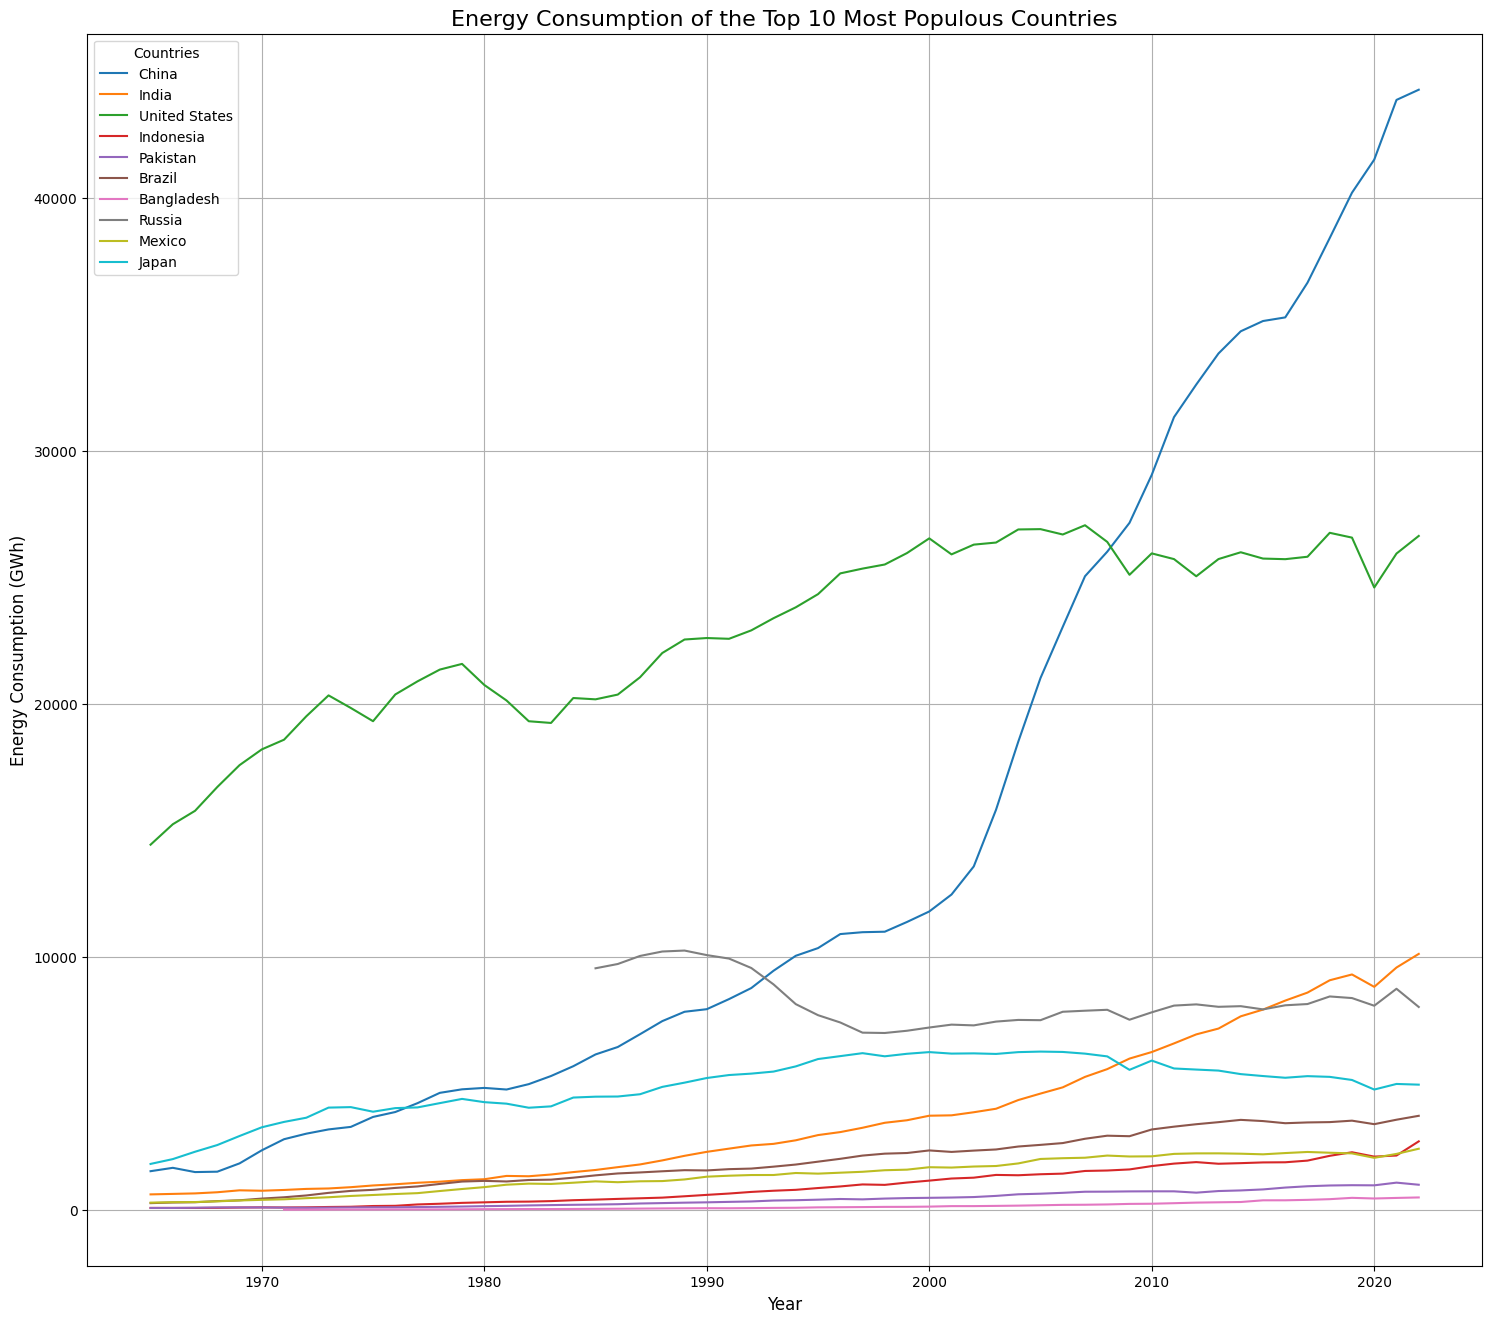

In [24]:
plt.figure(figsize=(18, 16))

for country in top10:
    country_df = top10_df[top10_df["country"] == country]
    plt.plot(
        country_df["year"],
        country_df["energy_consumption"],
        label=country
    )


plt.title("Energy Consumption of the Top 10 Most Populous Countries", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Energy Consumption (GWh)", fontsize=12)
plt.legend(title="Countries")
plt.grid(True)
plt.show()

### Q2 Energy Consumption per Capita (20 points)

- Visualise the energy consumption per capita in 1980, 1990, 2000, 2010 and 2020.
- Interpret the resulting table.

Info: You can use China and America for this question due to the lack of data on energy consumption by country over the years.

In [8]:
countries=["China", "United States"]
columns2=["country","year", "energy_per_capita"]
df2=df[columns2]
years=[1980, 1990, 2000, 2010, 2020]
china_us_df=df2[(df2["country"].isin(countries)) & (df2["year"].isin(years))]
china_us_df
#sadece iki ülkeyi ve belirli yılları kapsayan ve energy per capitayı gösteren bir df oluşturduk

,country,year,energy_per_capita
4363,China,1980,4914.158
4373,China,1990,6880.663
4383,China,2000,9334.936
4393,China,2010,21551.547
4403,China,2020,29133.936
20668,United States,1980,92999.711
20678,United States,1990,91124.930
20688,United States,2000,93999.859
20698,United States,2010,83397.477
20708,United States,2020,73236.141


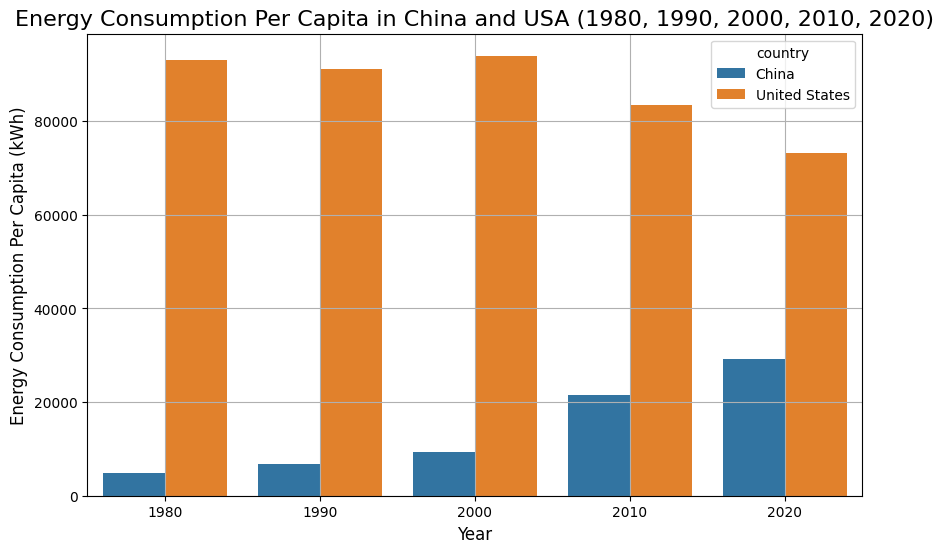

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x="year", y="energy_per_capita", hue="country", data=china_us_df)


plt.title("Energy Consumption Per Capita in China and USA (1980, 1990, 2000, 2010, 2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Energy Consumption Per Capita (kWh)", fontsize=12)
plt.grid(True)
plt.show()

### Q3 Distribution of Electricity Generation by Year (20 points)

- Analyze and interpret the distribution of energy (select either **renewable** or **non-renewable**) use rates in different years and the trends of these rates over time.

- Visualize your data in such a way that you can present them comparatively on a yearly basis and make inferences about the general trends in energy use based on this graph.

In [ ]:
#yıl yıl yenilenebilir enerji tüketimini primary energy consumptiona bölüp yüzdesini bulmamız lazım

columns3=["year","renewables_electricity", "electricity_generation"]
renewable_df=df[columns3][df["year"].between(1985,2022)]
#renewable_df 1970 2020 arası columns3'teki sütunları tutacak

yearly_totals=renewable_df.groupby("year").agg({
"renewables_electricity" :"sum", #yıllık total tüketimler
"electricity_generation":"sum"    
}).reset_index()

yearly_totals["renewable_ratio"]= yearly_totals["renewables_electricity"]/ yearly_totals["electricity_generation"] 
yearly_totals.head()



,year,renewables_electricity,electricity_generation,renewable_ratio
0,1985,1512.103,9549.238,0.158348
1,1986,1539.329,9821.943,0.156723
2,1987,1544.102,10293.600,0.150006
3,1988,1594.378,10742.213,0.148422
4,1989,1634.073,11254.359,0.145195


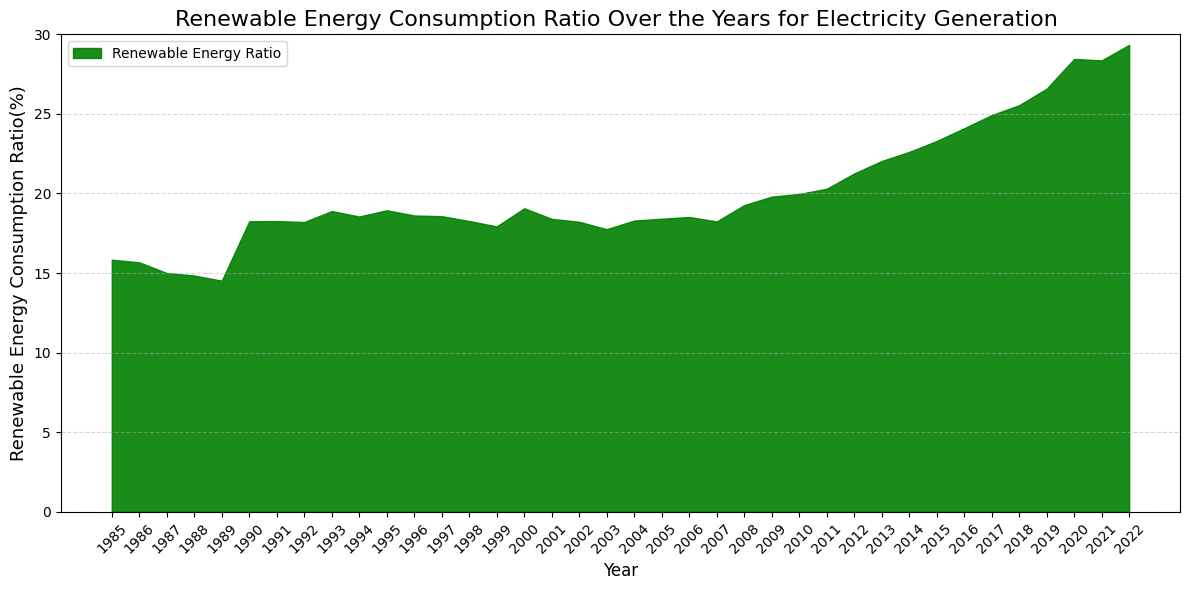

In [77]:
plt.figure(figsize=(12, 6))

plt.fill_between(
    yearly_totals["year"], 
    0, 
    yearly_totals["renewable_ratio"] * 100,  
    color="green", 
    alpha=0.9,  
    label="Renewable Energy Ratio"
)

plt.title("Renewable Energy Consumption Ratio Over the Years for Electricity Generation ", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Renewable Energy Consumption Ratio(%)", fontsize=13)

plt.ylim(0, 30)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

plt.xticks(yearly_totals["year"], rotation=45)

plt.tight_layout()  
plt.show()

### Q4 Relationship of Renewable Energy Share and Carbon Intensity (20 points)

- Visualize how the carbon emission intensity of countries changes as the share of renewable energy increases.

- Make inferences about the relationship between renewable energy use and carbon intensity through the visualization you have obtained.

In [98]:
#elimizde elektrik karbon yoğunluğunun verisi var, doğrudan bir karbon emission verisi yok. o yüzden buradan ilerleyeceğim
columns4=["year","renewables_electricity", "electricity_generation", "carbon_intensity_elec"]
renewable_df=df[columns4][df["year"].between(2000,2022)]


yearly_totals=renewable_df.groupby("year").agg({
"renewables_electricity" :"sum",
"electricity_generation":"sum",
"carbon_intensity_elec": "sum"  
}).reset_index()

yearly_totals["renewable_ratio"]= yearly_totals["renewables_electricity"]/ yearly_totals["electricity_generation"] 
yearly_totals["global_carbon_intensity"]= yearly_totals["carbon_intensity_elec"] / yearly_totals["electricity_generation"]
yearly_totals


,year,renewables_electricity,electricity_generation,carbon_intensity_elec,renewable_ratio,global_carbon_intensity
0,2000,2854.570,14968.830,93208.451,0.190701,6.226836
1,2001,2796.200,15192.620,94110.493,0.184050,6.194487
2,2002,2865.760,15729.470,93033.560,0.182190,5.914602
3,2003,2891.760,16288.480,93969.625,0.177534,5.769085
4,2004,3127.030,17089.060,94068.840,0.182984,5.504623
5,2005,3269.910,17759.480,94553.040,0.184122,5.324088
6,2006,3420.400,18466.810,94832.063,0.185219,5.135270
7,2007,3529.930,19352.790,94919.202,0.182399,4.904678
8,2008,3786.830,19654.880,94098.319,0.192666,4.787530
9,2009,3872.070,19556.380,93375.948,0.197995,4.774705


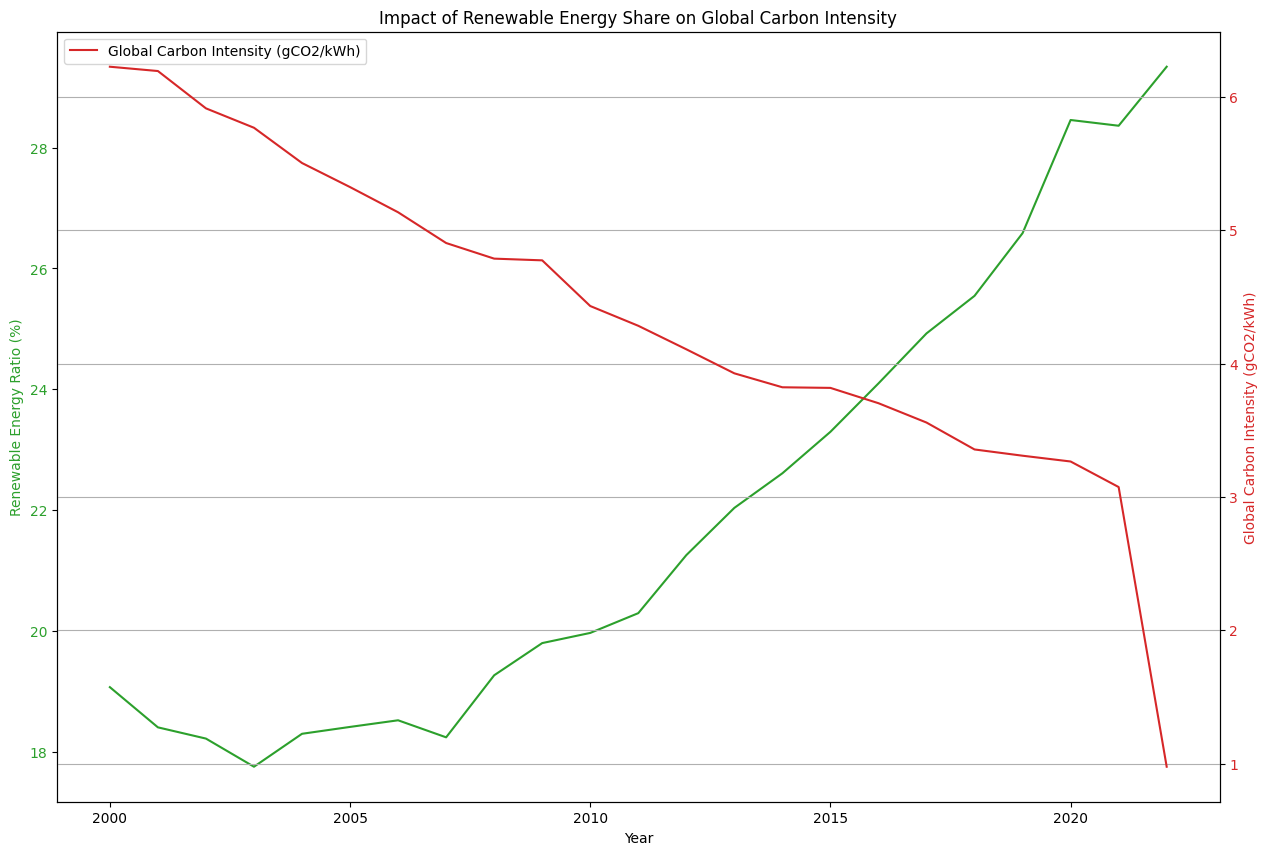

In [113]:

fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.plot(yearly_totals["year"], yearly_totals["renewable_ratio"] * 100, color='tab:green', label="Renewable Energy Ratio (%)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Renewable Energy Ratio (%)", color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx() 
ax2.plot(yearly_totals["year"], yearly_totals["global_carbon_intensity"], color='tab:red', label="Global Carbon Intensity (gCO2/kWh)")
ax2.set_ylabel("Global Carbon Intensity (gCO2/kWh)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Impact of Renewable Energy Share on Global Carbon Intensity")
plt.grid(True)
plt.legend(loc="upper left")

plt.show()


## Q5  Energy Consumption World Map (20 points)

- Visualize a map showing the energy consumption of countries on a world map with a color scale.

- Ensure that the map also shows countries with very low energy consumption in a meaningful way, and that it is organized using an approach that allows a better understanding of the data distribution.

- Use the **plotly** library to create your map and interpret your results.

In [ ]:
columns5 = ["country", "energy_consumption"]
energy_df = df[columns5]  


fig = px.choropleth(
    energy_df,
    locations="country",
    locationmode="country names",
    color="primary_energy_consumption",
    color_continuous_scale="YlOrRd", 
    range_color=[energy_df["primary_energy_consumption"].min(), energy_df["primary_energy_consumption"].quantile(0.98)],  # Yüksek tüketimleri vurgulamak için %95'e kadar
    labels={"primary_energy_consumption": "Energy Consumption (MWh)"},
    title="Energy Consumption by Country",
    hover_data={  
        'primary_energy_consumption': False,
    }
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.update_layout(
    geo=dict(
        showframe=False,
        projection_type="natural earth",
        showlakes=True,
        lakecolor="lightblue"
    )
)

fig.show()






